# CNN basic - facial expressions recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import to_categorical
import keras.backend as K

%matplotlib inline

Using TensorFlow backend.


## 1.  data loading, visualization, pre-processing

* load data using data_prepare.py

In [2]:
import data_prepare
train, test = data_prepare.load_data()

pickle files already present - loading data from pickle file


* visualization

In [11]:
def show_image(dataset):
    x, y = dataset
    label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy',
                  4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

    fig, axes = plt.subplots(3, 5)
    i = 523
    for ax in axes:
        for sub_ax in ax:
            sub_ax.imshow(x[i], cmap='gray')
            sub_ax.set_title(label_dict[y[i]], size=8)
            sub_ax.axis('off')
            i += 1
    fig.tight_layout()

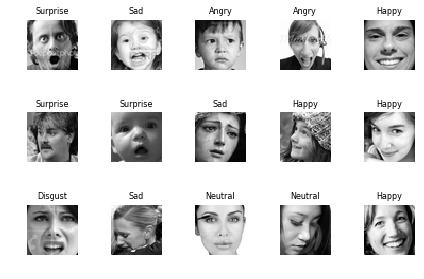

In [12]:
# vis train data
show_image(train)

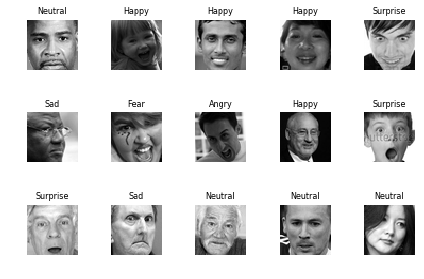

In [13]:
# vis test data
show_image(test)

In [3]:
def data_preprocess(dataset, num_labels, num_channel=1, sample_size=0):
    x, y = dataset
    num = x.shape[0]
    
    # sample
    if sample_size != 0:
        idx = np.random.randint(0, num, sample_size)
        x, y = x[idx], y[idx]

    # reshape
    num_case, img_rows, img_cols = x.shape
    if K.image_data_format() == 'channel_first':
        x_channel = x.reshape((num_case, num_channel, img_rows, img_cols))
        input_shape = (num_channel, img_rows, img_cols)
    else:
        x_channel = x.reshape((num_case, img_rows, img_cols, num_channel))
        input_shape = (img_rows, img_cols, num_channel)

    # normalize
    x_std = x_channel / 255
    y_dummy = to_categorical(y, num_labels)

    return x_std, y_dummy, input_shape


train_x, train_y, input_shape = data_preprocess(train, 7)
test_x, test_y, _ = data_preprocess(test, 7)

## 2. train a simple CNN model

In [4]:
# set model and train
def set_convnet(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(7, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


model = set_convnet(input_shape)
model.fit(train_x, train_y, epochs=15, batch_size=128, validation_split=0.3)

Train on 20096 samples, validate on 8613 samples
Epoch 1/15
20096/20096 [==============================] - 198s - loss: 1.7231 - acc: 0.3074 - val_loss: 1.5760 - val_acc: 0.3892
Epoch 2/15
20096/20096 [==============================] - 195s - loss: 1.5218 - acc: 0.4076 - val_loss: 1.4017 - val_acc: 0.4613
Epoch 3/15
20096/20096 [==============================] - 196s - loss: 1.3998 - acc: 0.4636 - val_loss: 1.3105 - val_acc: 0.5010
Epoch 4/15
20096/20096 [==============================] - 195s - loss: 1.3020 - acc: 0.4992 - val_loss: 1.2545 - val_acc: 0.5221
Epoch 5/15
20096/20096 [==============================] - 194s - loss: 1.2307 - acc: 0.5327 - val_loss: 1.2128 - val_acc: 0.5406
Epoch 6/15
20096/20096 [==============================] - 194s - loss: 1.1584 - acc: 0.5593 - val_loss: 1.1988 - val_acc: 0.5434
Epoch 7/15
20096/20096 [==============================] - 195s - loss: 1.0858 - acc: 0.5895 - val_loss: 1.1722 - val_acc: 0.5639
Epoch 8/15
20096/20096 [========================

In [6]:
# score on test datasets
score = model.evaluate(test_x, test_y)
print(score)

3584/3589 [============================>.] - ETA: 0s

In [15]:
model.summary()
model.save('./model/model1.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
__________